<a href="https://colab.research.google.com/github/GzpTez0514/-/blob/main/Pytorch%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A008_Pytorch%E5%AE%9E%E7%8E%B0%E5%8F%8D%E5%90%91%E4%BC%A0%E6%92%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
X = torch.tensor(1., requires_grad=True) # requires_grad 表示允许对X进行梯度计算
y = X ** 2

grad = torch.autograd.grad(y, X) # 这里返回的是在函数y = X ** 2上，X = 1时的导数值
print(grad)


(tensor(2.),)


In [ ]:
# 对于单层神经网络，autograd.grad会非常有效。但深层神经网络就不太适合使用grad函数了
import torch
import torch.nn as nn
from torch.nn import functional as F

torch.manual_seed(420)
X = torch.rand((500, 20), dtype=torch.float32) * 100
y = torch.randint(low=0, high=3, size=(500, 1), dtype=torch.float32)

# 定义神经网络的架构
class Model(nn.Module):
  def __init__(self, in_features=10, out_features=2):
    super().__init__()
    self.linear1 = nn.Linear(in_features, 13, bias=True)
    self.linear2 = nn.Linear(13, 8, bias=True)
    self.output = nn.Linear(8, out_features, bias=True)
    
  def forward(self, X):
    z1 = self.linear1(X)
    sigma1 = torch.relu(z1)
    z2 = self.linear2(sigma1)
    sigma2 = torch.sigmoid(z2)
    z3 = self.output(sigma2)
  # sigma3 = F.softmax(z3, dim=1)
    return z3

input_ = X.shape[1] # 特征的数目
output_ = len(y.unique()) # 分类的数目

# 实例化神经网络类
torch.manual_seed(420)
net = Model(in_features=input_, out_features=output_)
# 正向传播
zhat = net.forward(X)
# 定义损失函数
criterion = nn.CrossEntropyLoss()
# 对于打包好的CrossEntropyLoss而言，只需要输入zhat
loss = criterion(zhat, y.reshape(500).long())
print(loss)
print(net.linear1.weight.grad) # 不会返回任何值
# 反向传播，backward是任意损失函数类都可以调用的方法，对任意损失函数，backward都会求解其中全部w的梯度
loss.backward()
print(net.linear1.weight.grad) # 返回响应的梯度

# 与可以重复进行的正向传播不同，一次正向传播后，反向传播只能进行一次
# 如果希望可以重复进行反向传播，可以在第一次进行反向传播的时候加上参数retain_graph


tensor(1.1057, grad_fn=<NllLossBackward0>)
None
tensor([[ 3.3727e-04,  8.3354e-05,  4.0867e-04,  4.3058e-05,  1.4551e-04,
          6.5092e-05,  3.7088e-04,  2.8794e-04,  1.0495e-04,  4.7446e-05,
          8.8153e-05,  1.6899e-04,  1.0251e-04,  3.6197e-04,  1.2129e-04,
          7.2405e-05,  1.4479e-04,  4.9114e-06,  1.0770e-04,  9.5156e-05],
        [ 8.2042e-03,  2.1974e-02,  2.1073e-02,  1.3896e-02,  2.2161e-02,
          1.5936e-02,  1.6537e-02,  2.0259e-02,  1.9655e-02,  1.4728e-02,
          1.9212e-02,  2.0086e-02,  1.8295e-02,  8.4132e-03,  1.8036e-02,
          1.9979e-02,  2.0966e-02,  2.4730e-02,  9.3876e-03,  1.7475e-02],
        [ 9.1603e-03,  2.4275e-02,  2.3446e-02,  2.0096e-02,  2.5360e-02,
          1.7406e-02,  3.2555e-02,  2.2461e-02,  3.6793e-03,  2.7445e-02,
          2.1181e-02,  2.7724e-02,  1.7115e-02,  1.6943e-02,  1.7249e-02,
          3.3173e-02,  1.5115e-02,  3.0874e-02,  1.8391e-02,  2.4201e-02],
        [-2.8595e-04,  1.2968e-03,  1.3652e-03, -5.6692e-05, 

In [ ]:
# 在Pytorch中实现动量法
# 恢复小步长
lr = 0.1
gamma = 0.9

dw = net.linear1.weight.grad
w = net.linear1.weight.data
print(dw)
print(w)
# v要能够与dw相减，因此必须保持与w相同的结构
v = torch.zeros(dw.shape[0], dw.shape[1])
v = gamma * v - lr * dw
w = w - v
print(w)

tensor([[ 3.3727e-04,  8.3354e-05,  4.0867e-04,  4.3058e-05,  1.4551e-04,
          6.5092e-05,  3.7088e-04,  2.8794e-04,  1.0495e-04,  4.7446e-05,
          8.8153e-05,  1.6899e-04,  1.0251e-04,  3.6197e-04,  1.2129e-04,
          7.2405e-05,  1.4479e-04,  4.9114e-06,  1.0770e-04,  9.5156e-05],
        [ 8.2042e-03,  2.1974e-02,  2.1073e-02,  1.3896e-02,  2.2161e-02,
          1.5936e-02,  1.6537e-02,  2.0259e-02,  1.9655e-02,  1.4728e-02,
          1.9212e-02,  2.0086e-02,  1.8295e-02,  8.4132e-03,  1.8036e-02,
          1.9979e-02,  2.0966e-02,  2.4730e-02,  9.3876e-03,  1.7475e-02],
        [ 9.1603e-03,  2.4275e-02,  2.3446e-02,  2.0096e-02,  2.5360e-02,
          1.7406e-02,  3.2555e-02,  2.2461e-02,  3.6793e-03,  2.7445e-02,
          2.1181e-02,  2.7724e-02,  1.7115e-02,  1.6943e-02,  1.7249e-02,
          3.3173e-02,  1.5115e-02,  3.0874e-02,  1.8391e-02,  2.4201e-02],
        [-2.8595e-04,  1.2968e-03,  1.3652e-03, -5.6692e-05, -1.7480e-03,
         -2.6459e-03,  3.7307e-04, 

In [ ]:
from torch.nn import Module
# torch.optim实现带动量的梯度下降
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F

# 确定数据、确定优先需要设置的值
lr = 0.1
gamma = 0.9

torch.manual_seed(420)
X = torch.rand((500, 20), dtype=torch.float32) * 100
y = torch.randint(low=0, high=3, size=(500, 1), dtype=torch.float32)
input_ = X.shape[1] # 特征的数目
output_ = len(y.unique()) # 分类的数目

# 定义神经网络的架构
class Model(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()

    self.linear1 = nn.Linear(in_features, 13, bias=True)
    self.linear2 = nn.Linear(13, 8, bias=True)
    self.output = nn.Linear(8, out_features, bias=True)
  
  def forward(self, X):
    z1 = self.linear1(X)
    sigma1 = torch.relu(z1)
    z2 = self.linear2(sigma1)
    sigma2 = torch.sigmoid(z2)
    z3 = self.output(sigma2)
    #sigma3 = F.softmax(z3)
    return z3
  
# 实例化神经网络, 调用优化算法需要的参数
torch.manual_seed(420)
net = Model(in_features=input_, out_features=output_)
net.parameters() # 一次性导出神经网络架构下全部的权重和截距

# 定义损失函数
criterion = nn.CrossEntropyLoss()

# 定义优化算法
opt = optim.SGD(net.parameters(), # 要优化的参数是哪些
         lr = lr, # 学习率
         momentum = gamma) # 动量参数

<generator object Module.parameters at 0x7fecac82de50>


In [ ]:
# 接下来开始进行一轮梯度下降
zhat = net.forward(X) #前向传播
loss = criterion(zhat, y.reshape(500).long()) # 损失函数值
loss.backward() # 反向传播
opt.step() # 更新权重w,从这一瞬间开始，坐标点就发生了变化，所有的梯度必须重新计算
opt.zero_grad() # 清除原来储存好的，基于上一个坐标点计算的梯度，为下一次计算梯度腾出空间

print(loss)
print(net.linear1.weight.data[0][:10])

tensor(1.0851, grad_fn=<NllLossBackward0>)
tensor([ 0.1380, -0.1342,  0.2146, -0.1774, -0.0676, -0.1538,  0.1740,  0.0851,
        -0.1111, -0.1727])


In [ ]:
# TensorDataset与DataLoader
# TensorDataset -将特征与标签合并到同一个对象中
# LoadData -帮助我们进行小批量的分割
import torch
from torch.utils.data import TensorDataset
a = torch.randn(500, 2, 3)
b = torch.randn(500, 3, 4, 5)
c = torch.randn(500, 1)

# 被合并的对象第一维度上的值相等
for i in TensorDataset(b, c):
  print(i)
  break

(tensor([[[ 1.4324, -1.5099,  0.9286, -0.2416,  0.5485],
         [ 2.4199, -0.0434, -0.0223,  0.4258, -2.3547],
         [ 0.5817, -0.1884, -1.4250, -0.5167, -0.6050],
         [-0.0143,  0.1180,  0.3792,  0.6414,  0.1110]],

        [[ 0.1669,  0.2931,  3.3509,  1.6537,  1.2335],
         [-0.8471, -0.1266, -0.1298,  0.1220, -0.4691],
         [-0.0292,  0.5957,  0.4642, -0.6832,  1.3422],
         [-0.3683,  1.6137,  0.0393,  2.1853,  1.5552]],

        [[ 0.9770,  0.2914,  1.3271, -0.2651, -0.5037],
         [ 2.1154, -0.6312,  0.1289, -1.2272, -0.0769],
         [ 0.3284, -0.4702, -0.1327, -1.3445,  1.3452],
         [-0.3232,  0.7399,  0.2545,  0.0505,  0.9385]]]), tensor([-0.7568]))


In [ ]:
# 使用划分小批量的功能DataLoader
from torch.utils.data import DataLoader
data = TensorDataset(b, c)
for i in DataLoader(data):
  print(i)
  break

[tensor([[[[ 1.4324, -1.5099,  0.9286, -0.2416,  0.5485],
          [ 2.4199, -0.0434, -0.0223,  0.4258, -2.3547],
          [ 0.5817, -0.1884, -1.4250, -0.5167, -0.6050],
          [-0.0143,  0.1180,  0.3792,  0.6414,  0.1110]],

         [[ 0.1669,  0.2931,  3.3509,  1.6537,  1.2335],
          [-0.8471, -0.1266, -0.1298,  0.1220, -0.4691],
          [-0.0292,  0.5957,  0.4642, -0.6832,  1.3422],
          [-0.3683,  1.6137,  0.0393,  2.1853,  1.5552]],

         [[ 0.9770,  0.2914,  1.3271, -0.2651, -0.5037],
          [ 2.1154, -0.6312,  0.1289, -1.2272, -0.0769],
          [ 0.3284, -0.4702, -0.1327, -1.3445,  1.3452],
          [-0.3232,  0.7399,  0.2545,  0.0505,  0.9385]]]]), tensor([[-0.7568]])]


In [ ]:
# DataLoad()的参数
bs = 120
dataset = DataLoader(data,
           batch_size=bs,
           shuffle=True,
           drop_last=True)

for i in dataset:
  print(i[0].shape)

print(len(dataset)) # 一共有多少个batch
print(len(dataset.dataset)) # 展示里面全部的数据
print(dataset.dataset[0]) # 单个样本
print(dataset.dataset[0][0]) # 单个样本的特征
print(dataset.dataset[0][1]) # 单个样本的标签
print(dataset.batch_size) # 查看现有的batch_size


torch.Size([120, 3, 4, 5])
torch.Size([120, 3, 4, 5])
torch.Size([120, 3, 4, 5])
torch.Size([120, 3, 4, 5])
4
500
(tensor([[[ 1.4324, -1.5099,  0.9286, -0.2416,  0.5485],
         [ 2.4199, -0.0434, -0.0223,  0.4258, -2.3547],
         [ 0.5817, -0.1884, -1.4250, -0.5167, -0.6050],
         [-0.0143,  0.1180,  0.3792,  0.6414,  0.1110]],

        [[ 0.1669,  0.2931,  3.3509,  1.6537,  1.2335],
         [-0.8471, -0.1266, -0.1298,  0.1220, -0.4691],
         [-0.0292,  0.5957,  0.4642, -0.6832,  1.3422],
         [-0.3683,  1.6137,  0.0393,  2.1853,  1.5552]],

        [[ 0.9770,  0.2914,  1.3271, -0.2651, -0.5037],
         [ 2.1154, -0.6312,  0.1289, -1.2272, -0.0769],
         [ 0.3284, -0.4702, -0.1327, -1.3445,  1.3452],
         [-0.3232,  0.7399,  0.2545,  0.0505,  0.9385]]]), tensor([-0.7568]))
tensor([[[ 1.4324, -1.5099,  0.9286, -0.2416,  0.5485],
         [ 2.4199, -0.0434, -0.0223,  0.4258, -2.3547],
         [ 0.5817, -0.1884, -1.4250, -0.5167, -0.6050],
         [-0.0143, 

In [ ]:
# 对于小批量随机梯度下降而言，我们一般这样使用TensorDataset与DataLoader:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

torch.manual_seed(420)
X = torch.rand((50000, 20), dtype=torch.float32) * 100 
y = torch.randint(low=0, high=3, size=(50000, 1), dtype=torch.float32)

epochs = 4 # 请让神经网络学习4次数据
bs = 4000

data = TensorDataset(X, y)
batchdata = DataLoader(data,
            batch_size=bs,
            shuffle=True)

print(len(batchdata)) # 查看具体被分了多少个batch 13

# 可以使用.datasets查看数据集相关的属性
print(len(batchdata.dataset)) # 总共有多少数据 50000
print(batchdata.dataset[0]) # 查看其中一个样本
print(batchdata.dataset[0][0]) # 一个样本的特征张量
print(batchdata.dataset[0][0]) # 一个样本的标签
print(batchdata.batch_size) # 查看现在的batch_size是多少 4000

13
50000
(tensor([80.5354, 19.9040, 97.5853, 10.2817, 34.7460, 15.5433, 88.5615, 68.7572,
        25.0620, 11.3297, 21.0499, 40.3541, 24.4790, 86.4358, 28.9626, 17.2895,
        34.5751,  1.1728, 25.7179, 22.7224]), tensor([2.]))
tensor([80.5354, 19.9040, 97.5853, 10.2817, 34.7460, 15.5433, 88.5615, 68.7572,
        25.0620, 11.3297, 21.0499, 40.3541, 24.4790, 86.4358, 28.9626, 17.2895,
        34.5751,  1.1728, 25.7179, 22.7224])
tensor([80.5354, 19.9040, 97.5853, 10.2817, 34.7460, 15.5433, 88.5615, 68.7572,
        25.0620, 11.3297, 21.0499, 40.3541, 24.4790, 86.4358, 28.9626, 17.2895,
        34.5751,  1.1728, 25.7179, 22.7224])
4000


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: C:\学习资料文件夹\深度之眼\菜菜Pytorch深度学习\PyTorch课件\WEEK 3、4\Datasets\FashionMNIST\FashionMNIST
    Split: Train
    StandardTransform
Transform: ToTensor()
60000
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0,

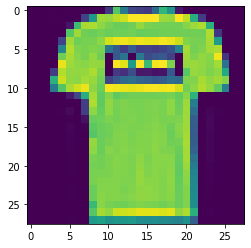

In [ ]:
# 在MINST-FASHION上实现神将网络的实现流程
import torch
import torch.nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# 确定数据
lr = 0.15
gamma = 0
epochs = 10
bs = 128

# 导入数据，分割小批量
import torchvision
import torchvision.transforms as transforms

# 初次运行时会下载，需要等待较长的时间
mnist = torchvision.datasets.FashionMNIST(
    root = 'C:\学习资料文件夹\深度之眼\菜菜Pytorch深度学习\PyTorch课件\WEEK 3、4\Datasets\FashionMNIST\FashionMNIST',
    train = True,
    download = True,
    transform = transforms.ToTensor()
    )

print(mnist)
print(len(mnist)) # 60000
print(mnist.data)
print(mnist.data.shape) # torch.Size([60000, 28, 28])
print(mnist.targets.unique())
print(mnist.classes) # 标签分类信息

# 查看图像的模样
import matplotlib.pyplot as plt
import numpy

print(mnist[0][0].shape) # torch.Size([1, 28, 28])
print(mnist[0][0])
print(mnist[0][0].view(28, 28).numpy())
plt.imshow(mnist[0][0].view(28, 28).numpy())
plt.imshow(mnist[1][0].view(28, 28).numpy())

In [ ]:
# 确定数据，确定超参数
lr = 0.15
gamma = 0
epochs = 10
bs = 128

mnist = torchvision.datasets.FashionMNIST(
    root = 'C:\学习资料文件夹\深度之眼\菜菜Pytorch深度学习\PyTorch课件\WEEK 3、4\Datasets\FashionMNIST\FashionMNIST',
    download = True,
    train = True,
    transform = transforms.ToTensor()
    )

batchdata = DataLoader(mnist, batch_size=bs, shuffle=True)
print(batchdata)
for X,y in batchdata:
  print(X.shape)
  print(y.shape)
  break

input_ = mnist.data[0].numel() # 请问这个张量中总共有多少个元素
output_ = len(mnist.targets.unique())
print(input_) # 784
print(output_) # 10

# 定义神经网络的架构
class Model(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__
    self.linear1 = nn.Linear(in_features, 1280, bias=False)
    self.output = nn.Linear(1280, out_features, bias=False)
  
  def forward(self, X):
    X = X.view(-1, 28 * 28)
    z1 = self.linear1(X)
    sigma1 = torch.relu(z1)
    z2 = self.output(sigma1)
    sigma2 = F.log_softmax(z2, dim=1)
    return sigma2



torch.Size([128, 1, 28, 28])
torch.Size([128])
784
10
